In [8]:

VERSION = '4.7'

import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# modifying font  # fontname='Liberation Serif'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.size'] = 12

#### optimization plots

In [9]:
#TODO: rifare solo con numpy senza passare da notebook

# creating DF out of csv files
sg_name = './plot_data/opt_5_integral/sg.csv'
cf_name = './plot_data/opt_5_integral/cf.csv'
rp_name = './plot_data/opt_5_integral/random.csv'
sg_df = pd.read_csv(sg_name) # put the csv file in the right folder
cf_df = pd.read_csv(cf_name)
rp_df = pd.read_csv(rp_name)

#
# sg_df['mean'] = sg_df.mean(axis=1)
# sg_df['std'] = sg_df.std(axis=1)
# sg_df['var'] = sg_df.var(axis=1)
# cf_df['mean'] = cf_df.mean(axis=1)
# cf_df['std'] = cf_df.std(axis=1)
# cf_df['var'] = cf_df.var(axis=1)
rp_sgap_mean = rp_df['sgap mean']
rp_sgap_std = rp_df['sgap std']


In [10]:
#
sg_mean = numpy.array(sg_df['mean'])
sg_std = numpy.array(sg_df['std'])
sg_var = sg_std**2
cf_mean = numpy.array(cf_df['mean'])
cf_std = numpy.array(cf_df['std'])
cf_var = cf_std**2
#
rp_sg_mean = numpy.full(sg_mean.size, numpy.mean(rp_sgap_mean))
rp_sg_std = numpy.full(sg_mean.size, numpy.mean(rp_sgap_std))  # TODO: not sure this is correct
rp_sg_var = rp_sg_std**2

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

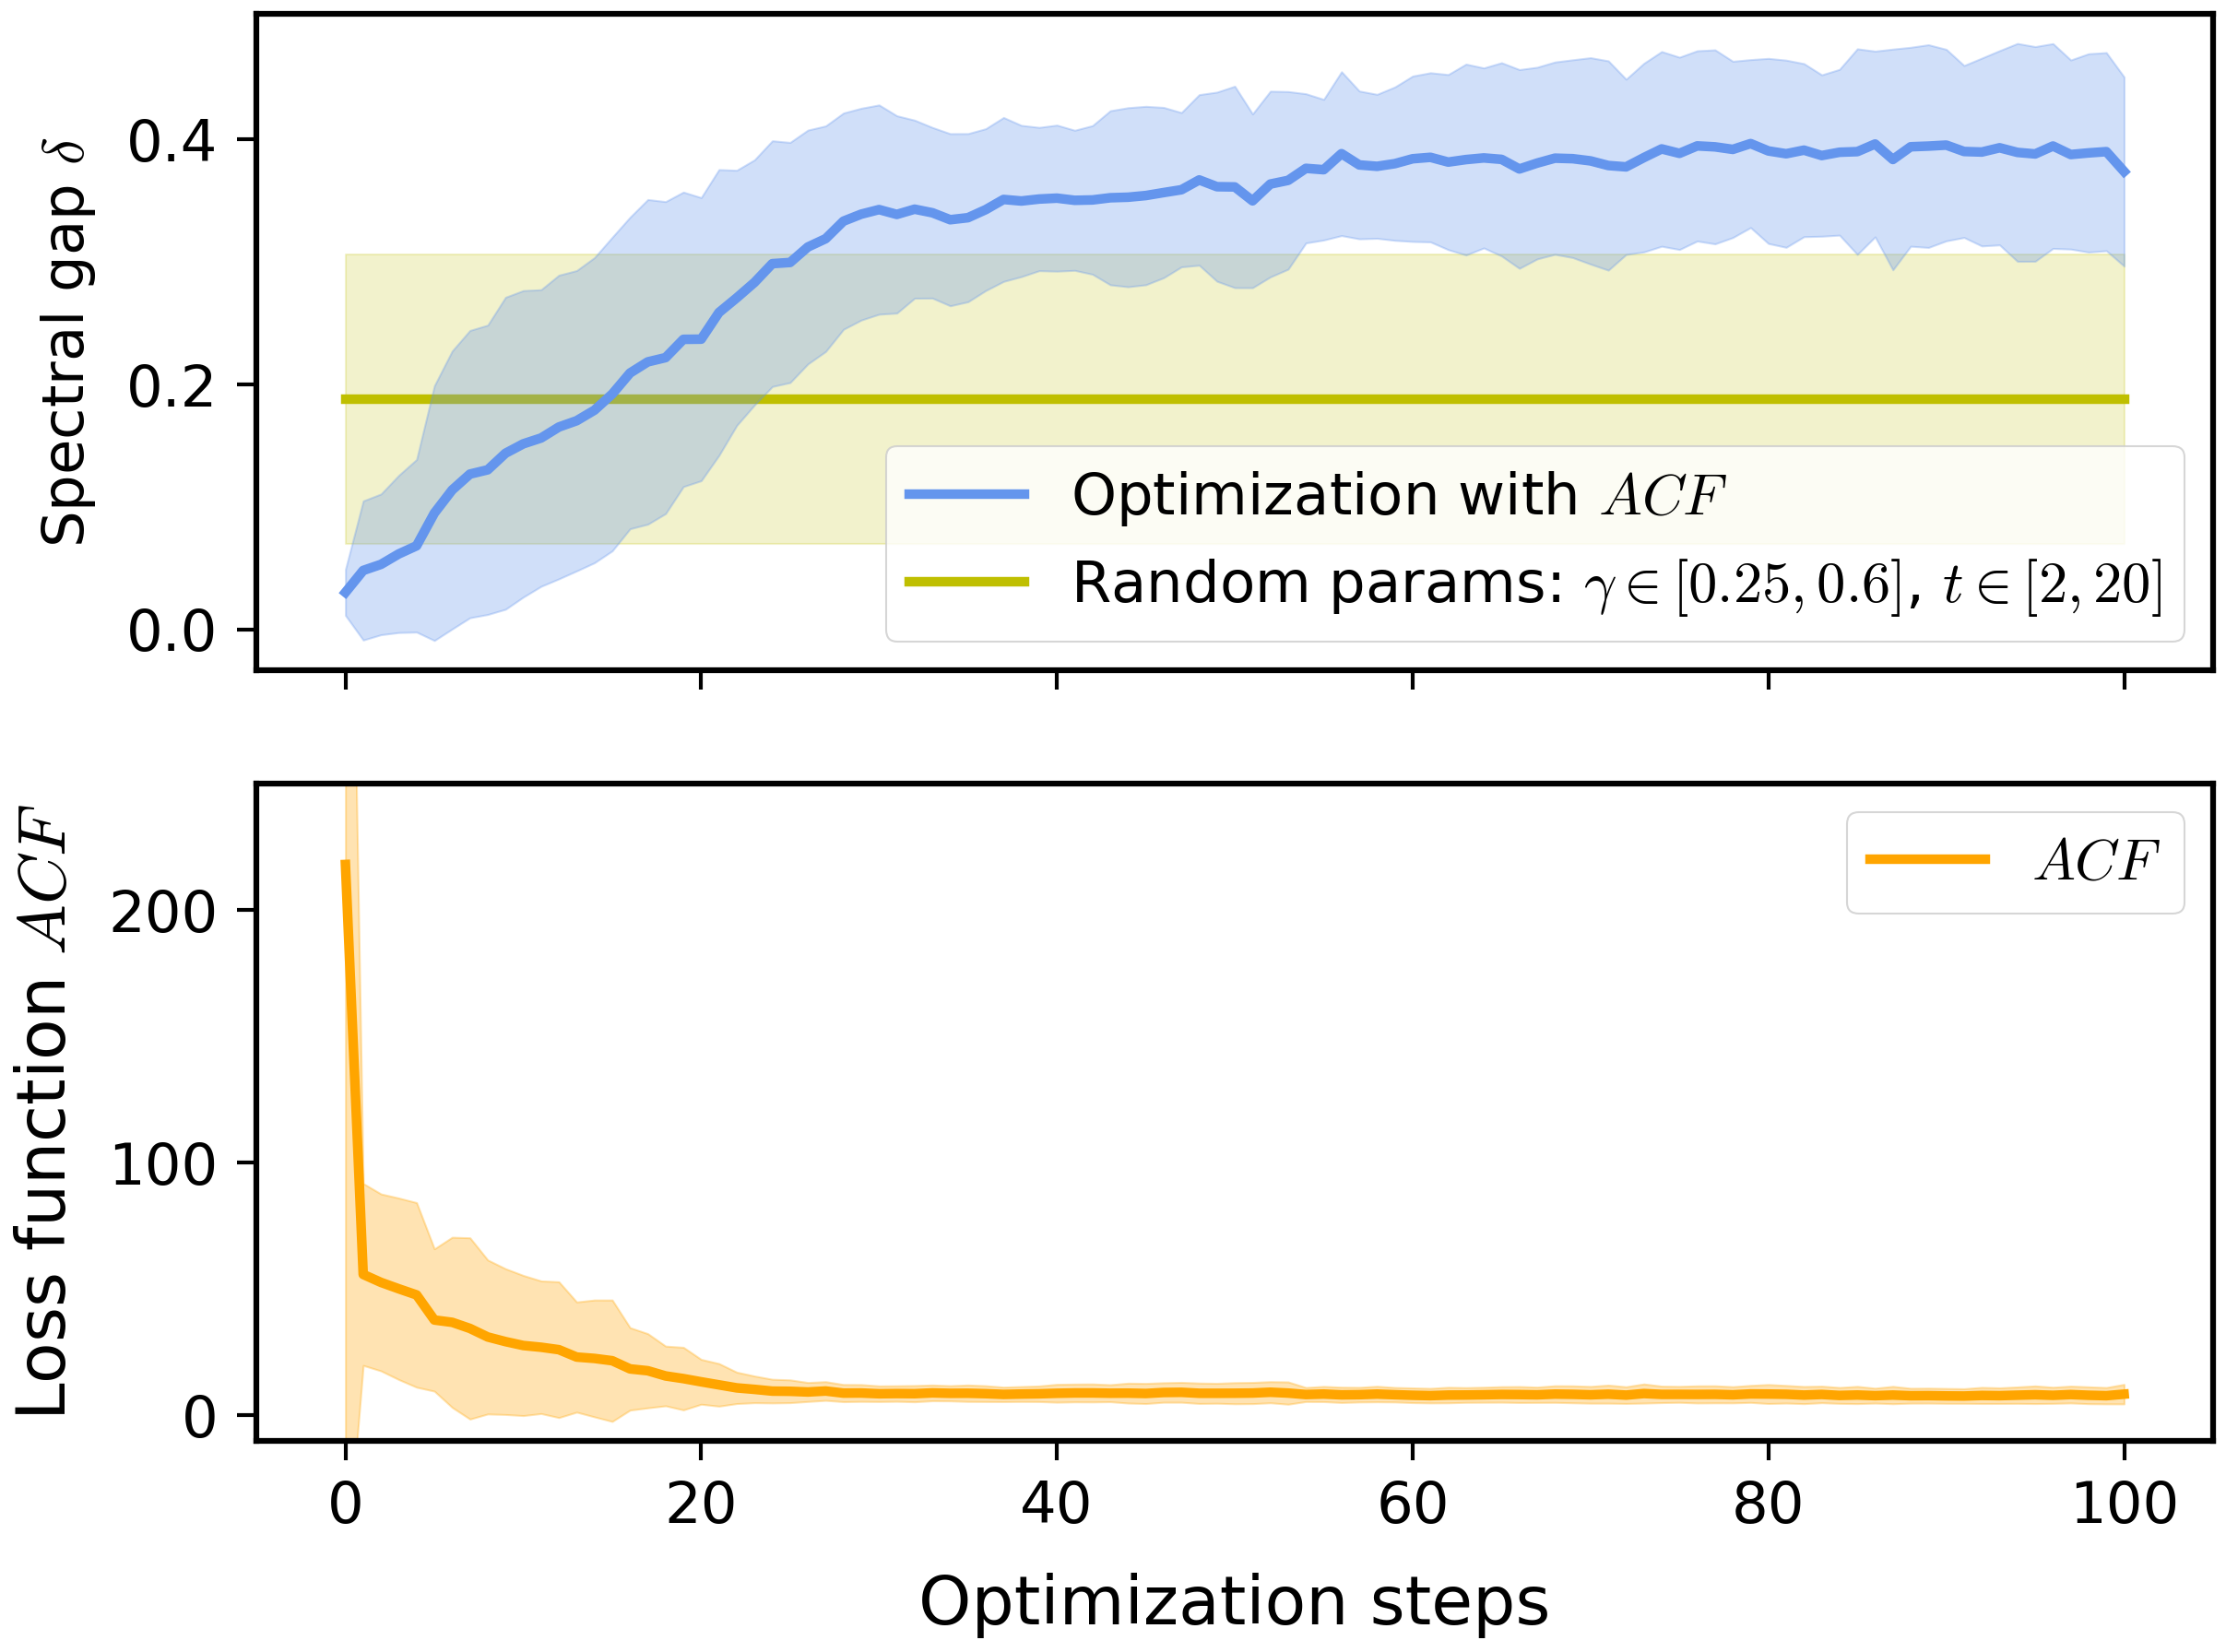

In [32]:
#
plot_name = 'opt_5_integral'
n_spins = 5

# plotting
subplots_n = 2
figure, axis = plt.subplots((subplots_n), figsize=(15, 11), dpi=150)
figure.tight_layout(h_pad=3, w_pad=4)  # distances between subplots
#
# spectral gap
axis[0].plot(range(sg_mean.size), sg_mean, color='cornflowerblue', label='Optimization with $ACF$',
               linestyle='-', lw=5, zorder=2)  # marker='o', markersize=10
axis[0].fill_between(range(sg_mean.size), sg_mean-sg_std, sg_mean+sg_std, alpha=0.3,
                     edgecolor='cornflowerblue', facecolor='cornflowerblue', linewidth=1, zorder=2)  # sg_mean-sg_var, sg_mean+sg_var
# random approach spectral gap
axis[0].plot(range(rp_sg_mean.size), rp_sg_mean, color='y', label='Random params: $\gamma \in [0.25, 0.6]$, $t \in [2, 20]$',
               linestyle='-', lw=5, zorder=1)  # marker='o', markersize=10
axis[0].fill_between(range(rp_sg_mean.size), rp_sg_mean-rp_sg_std, rp_sg_mean+rp_sg_std, alpha=0.2,
                     edgecolor='y', facecolor='y', linewidth=1, zorder=1)  # rp_sg_mean-rp_sg_var, rp_sg_mean+rp_sg_var
#
# axis[0].text(-0.3, + 1.2, '(a)' + f'   $n = {n_spins}$', fontsize = 30, transform=axis[0].transAxes, fontweight='bold')
#axis[0].grid(linestyle='--')
axis[0].set_xticklabels([])
axis[0].set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis[0].tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis[0].legend(fontsize=30)
# axis[0].set_title('Spectral gap $\delta$')
# axis[0].set_ylim(0, 1)
for ax in ['top','bottom','left','right']:
    axis[0].spines[ax].set_linewidth(3)
# cost function
axis[1].plot(range(cf_mean.size), cf_mean, color='orange',
                  label='$ACF$', linestyle='-', lw=5)  # , markersize=10, marker='o'
axis[1].fill_between(range(cf_mean.size), cf_mean-cf_std, cf_mean+cf_std, alpha=0.3,
                     edgecolor='orange', facecolor='orange', linewidth=1)
# axis[1].grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
axis[1].set_ylabel('Loss function $ACF$', fontsize=35, labelpad=15)
axis[1].set_xlabel('Optimization steps', fontsize=35, labelpad=20)
axis[1].tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
axis[1].legend(fontsize=30)
axis[1].set_ylim(-10, 250)
for ax in ['top','bottom','left','right']:
    axis[1].spines[ax].set_linewidth(3)
#
plt.show()

In [33]:
# saving the plot as png file
png_name = './final_plots/1_' + plot_name + '.png'
figure.savefig(png_name, bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

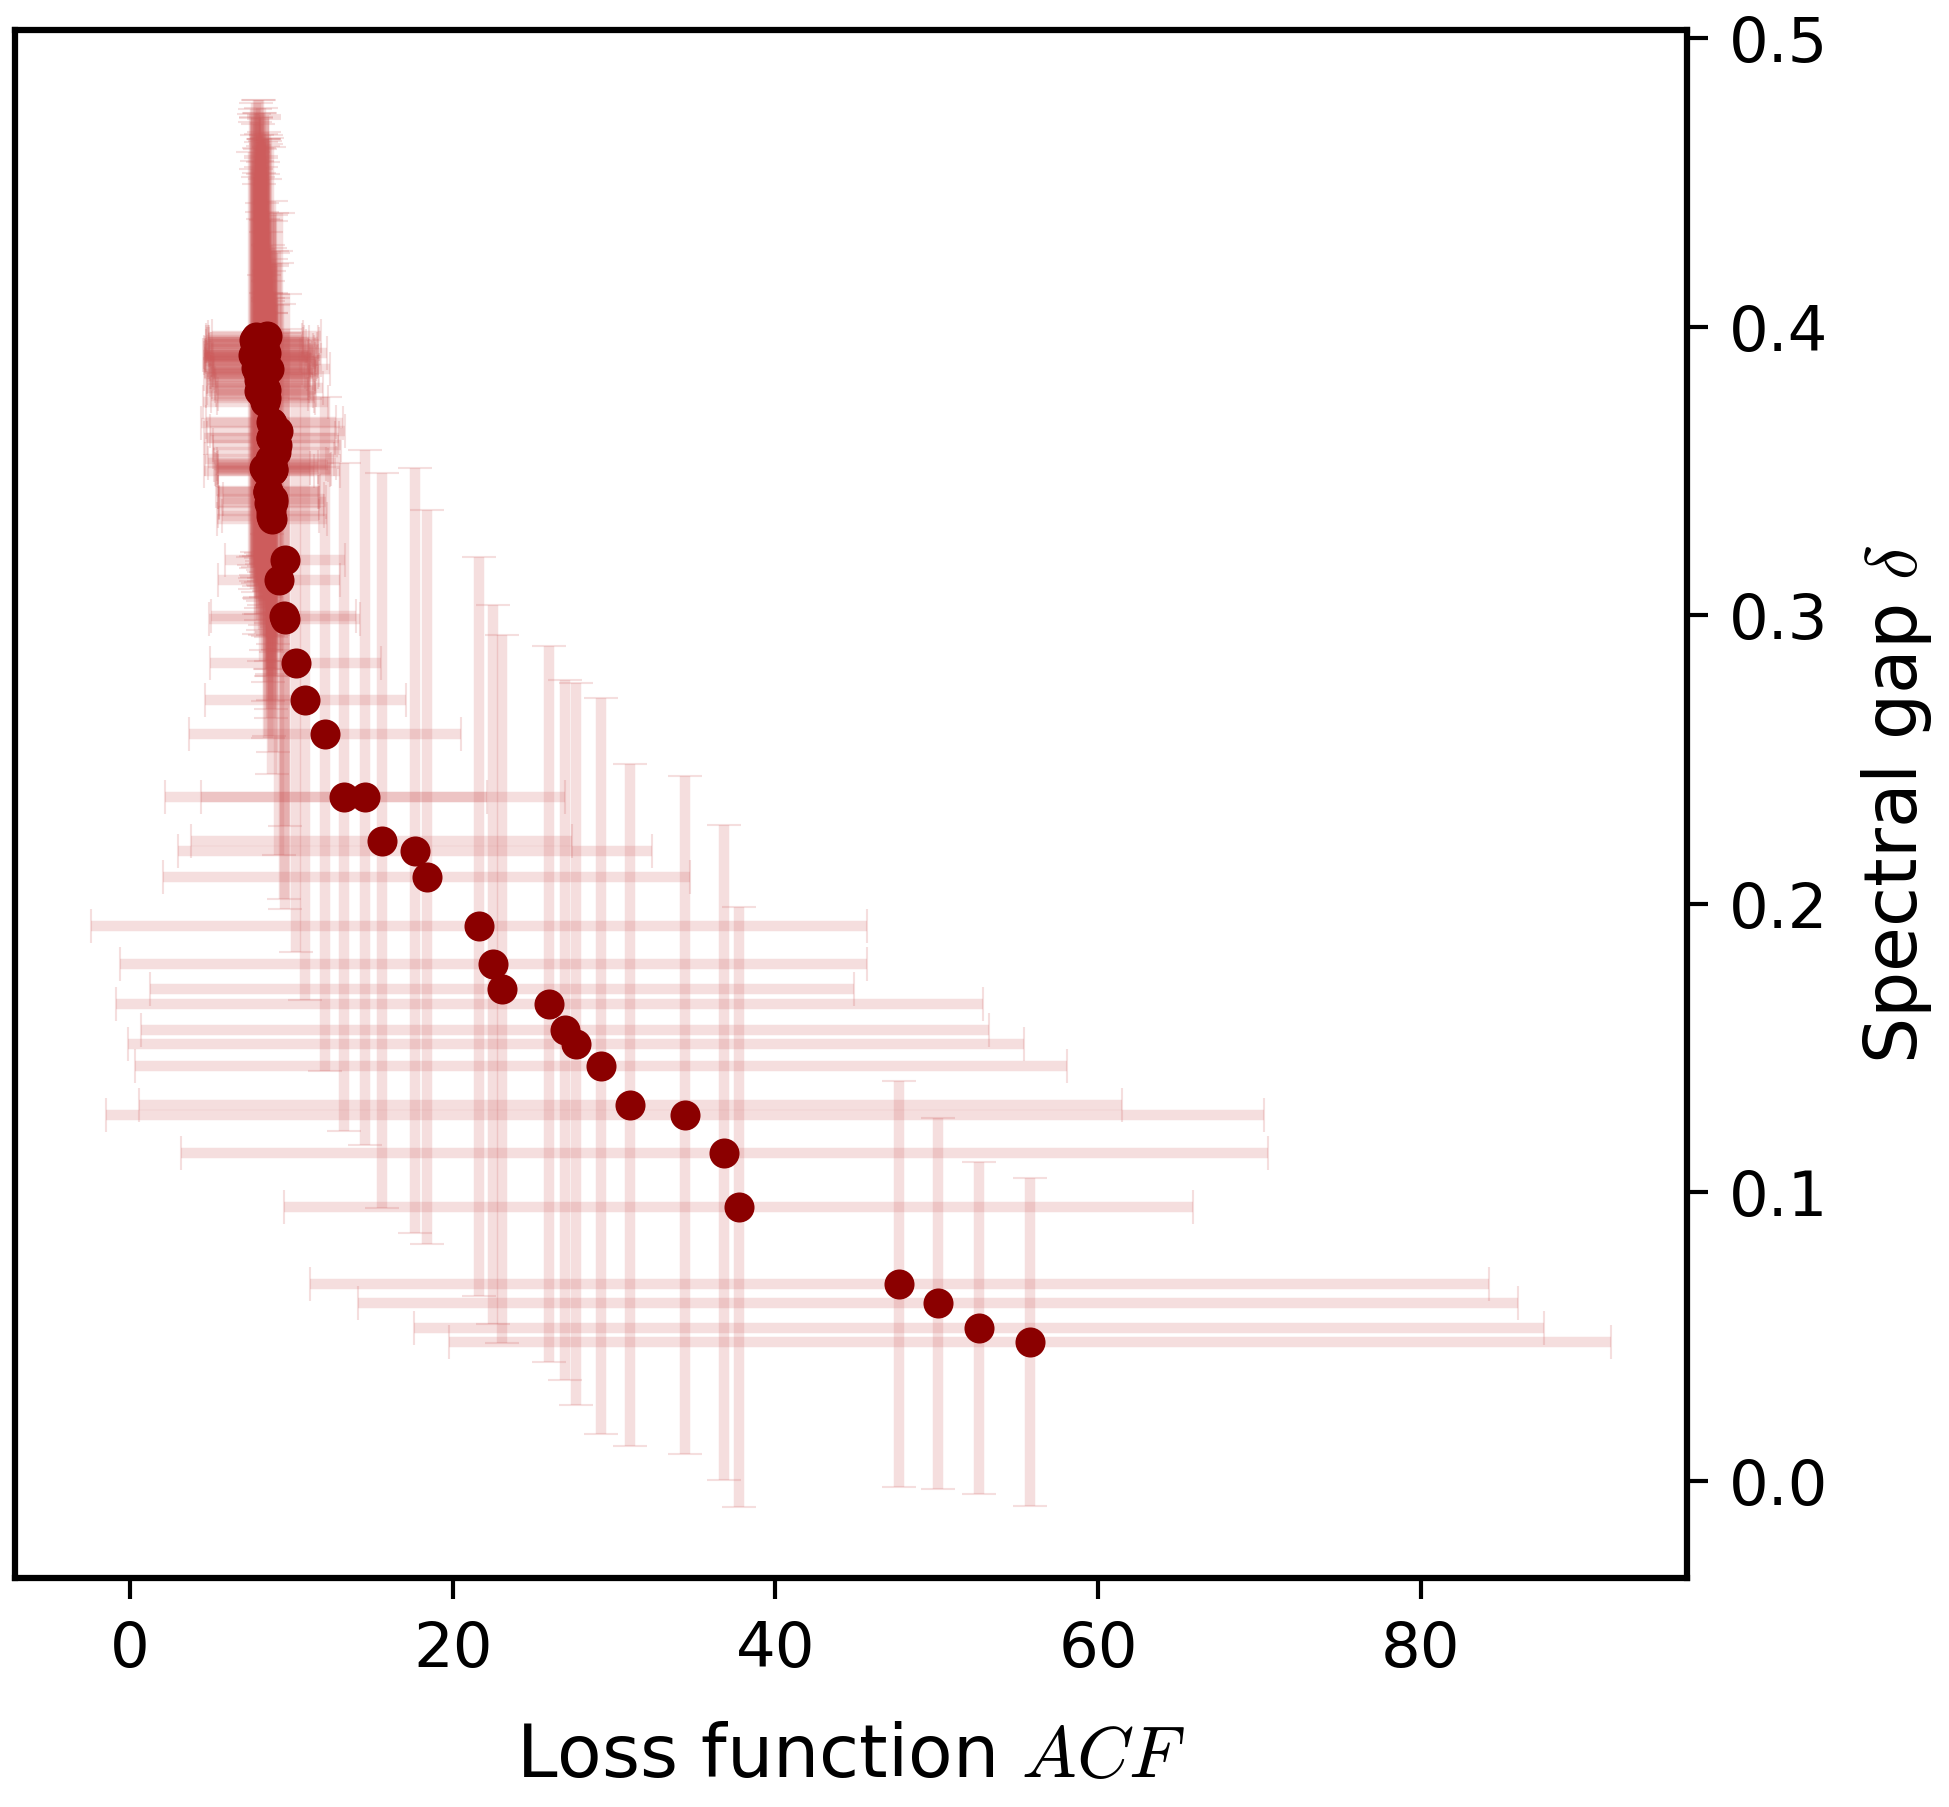

In [34]:
subplots_n = 1
figure, axis = plt.subplots((subplots_n), figsize=(12, 11), dpi=150)
figure.tight_layout(h_pad=4, w_pad=4)  # distances between subplots
# correlation
markers, caps, bars = axis.errorbar(cf_mean[1:], sg_mean[1:], yerr=sg_std[1:], xerr=cf_std[1:], color='darkred',
               ecolor='indianred', elinewidth=5, capsize=8, barsabove=True, markersize=12,
               alpha=1, fmt='o', zorder=1) # (remove first point as it's usually an outlier)
axis.scatter(cf_mean[1:], sg_mean[1:], s=180, marker='o', color='darkred', zorder=3)
[bar.set_alpha(0.2) for bar in bars]
[cap.set_alpha(0.2) for cap in caps]
#axis.grid(linestyle='--')
# if subplots_n == 2:
#     pass
# else:
#     axis[1].set_xticklabels([])
axis.yaxis.set_label_position("right")
axis.yaxis.tick_right()
axis.set_ylabel('Spectral gap $\delta$', fontsize=35, labelpad=15)
axis.set_xlabel('Loss function $ACF$', fontsize=35, labelpad=20)
axis.tick_params(labelsize=30, axis='both', which='major', pad=10, width=2, length=10)
# axis[2].legend(fontsize=15)
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(3)
#
plt.show()

In [35]:
# saving the plot as png file
png_name = './final_plots/2_' + plot_name + '.png'
figure.savefig(png_name, bbox_inches='tight')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

#### 3d plots

#### observables convergence plots

## 